Media: 21.1 Standard Dev:  27.762684788519046
   valores   z_score  es_anomalia
0       10 -0.399817        False
1       12 -0.327778        False
2       11 -0.363798        False
3       13 -0.291759        False
4       12 -0.327778        False
5      100  2.841944         True
6       11 -0.363798        False
7       14 -0.255739        False
8       13 -0.291759        False
9       15 -0.219719        False


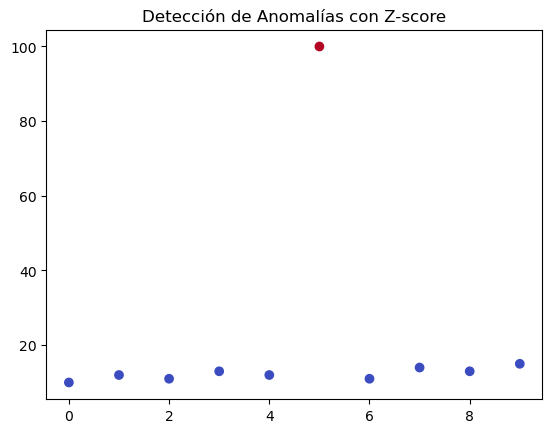

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Crear un dataset de ejemplo (puedes reemplazar esto con tu propio dataset)
data = pd.DataFrame({
    'valores': [10, 12, 11, 13, 12, 100, 11, 14, 13, 15]  # 100 es una anomalía clara
})

# Calcular la media y la desviación estándar
media = data['valores'].mean()

desviacion = data['valores'].std()
print('Media:', media, "Standard Dev: ", desviacion)

# Calcular el Z-score para cada dato

data['z_score'] = (data['valores'] - media) / desviacion



# Definir un umbral (típicamente 3, significa 3 desviaciones estándar)
umbral = 2.5
data['es_anomalia'] = data['z_score'].abs() > umbral

# Mostrar resultados
print(data)

# Visualización
plt.scatter(range(len(data)), data['valores'], c=data['es_anomalia'], cmap='coolwarm')
plt.title('Detección de Anomalías con Z-score')
plt.show()

   feature1  feature2  anomalia
0       1.0       5.0         0
1       2.0       4.8         0
2       1.5       5.2         0
3       2.5       4.9         0
4     100.0      50.0         1
5       1.8       5.1         0
6       2.2       4.7         0


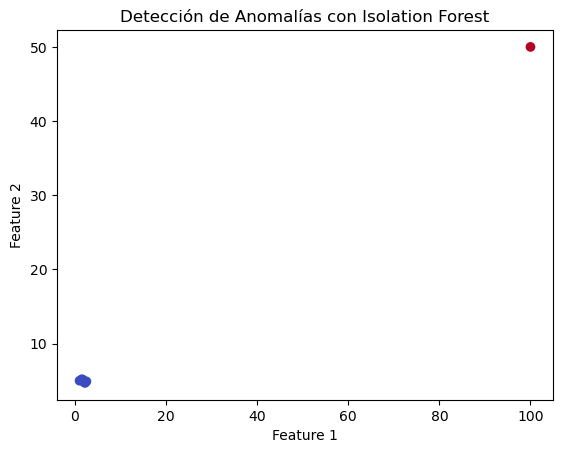

In [7]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Dataset de ejemplo (puedes cargar tu propio CSV o dataset aquí)
data = pd.DataFrame({
    'feature1': [1, 2, 1.5, 2.5, 100, 1.8, 2.2],
    'feature2': [5, 4.8, 5.2, 4.9, 50, 5.1, 4.7]
})

# Entrenar el modelo Isolation Forest
modelo = IsolationForest(contamination=0.1, random_state=42)  # contamination es la proporción esperada de anomalías
data['anomalia'] = modelo.fit_predict(data)

# Convertir etiquetas: -1 es anomalía, 1 es normal
data['anomalia'] = data['anomalia'].map({1: 0, -1: 1})

# Mostrar resultados
print(data)

# Visualización
plt.scatter(data['feature1'], data['feature2'], c=data['anomalia'], cmap='coolwarm')
plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()